In [49]:
import os
import logging

#Set absl logging level to suppress warnings
logging.getLogger('absl').setLevel(logging.ERROR)

#Standard Data Packages
import pandas as pd
import numpy as np

#Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

#Scikit
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#xgboost
from xgboost import XGBClassifier

#Other Packages
import joblib

## Load Datasets

In [21]:
#load dataset
train_set = pd.read_csv('../data/train_norm_set.csv')
val_set = pd.read_csv('../data/val_norm_set.csv')

In [22]:
#split into features & labels

features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

X_train = train_set[features]
Y_train = train_set["Exited"]

X_val = val_set[features]
Y_val = val_set["Exited"]

In [23]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.470,0,0,0.472973,0.2,0.000000,0.333333,1,1,0.459140
1,0.512,0,1,0.081081,0.2,0.000000,0.000000,0,1,0.454370
2,0.566,1,1,0.351351,0.1,0.473928,0.000000,1,0,0.238851
3,0.504,1,1,0.297297,0.2,0.597701,0.333333,1,1,0.413466
4,0.590,0,1,0.175676,0.4,0.527510,0.000000,1,0,0.759450


## XGBoost Experiment 1

#### Fit and Evaluate on Train Data

Train set score: 0.8954753598850446
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     91072
           1       0.83      0.64      0.72     24451

    accuracy                           0.90    115523
   macro avg       0.87      0.80      0.83    115523
weighted avg       0.89      0.90      0.89    115523



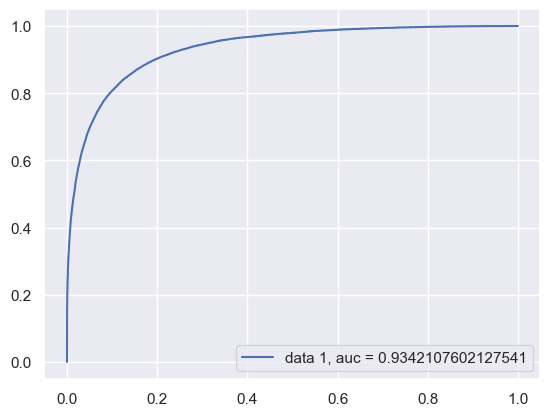

In [50]:
xgb = XGBClassifier(n_estimators = 200, random_state=42)

xgb.fit(X_train, Y_train)


#model evaluations
print("Train set score: " + str(xgb.score(X_train, Y_train)))

predict_train = xgb.predict(X_train)

print(metrics.classification_report(Y_train, predict_train))

#ROC Curve and AUC
y_pred_proba = xgb.predict_proba(X_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     39041
           1       0.74      0.56      0.64     10470

    accuracy                           0.86     49511
   macro avg       0.81      0.75      0.78     49511
weighted avg       0.86      0.86      0.86     49511



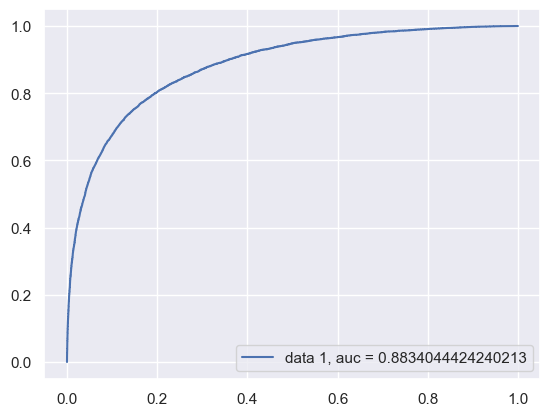

In [51]:
#make prediction on validation set
score_val = xgb.score(X_val, Y_val)

predict_val = xgb.predict(X_val)

#evaluate
print(metrics.classification_report(Y_val, predict_val))

y_pred_proba = xgb.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

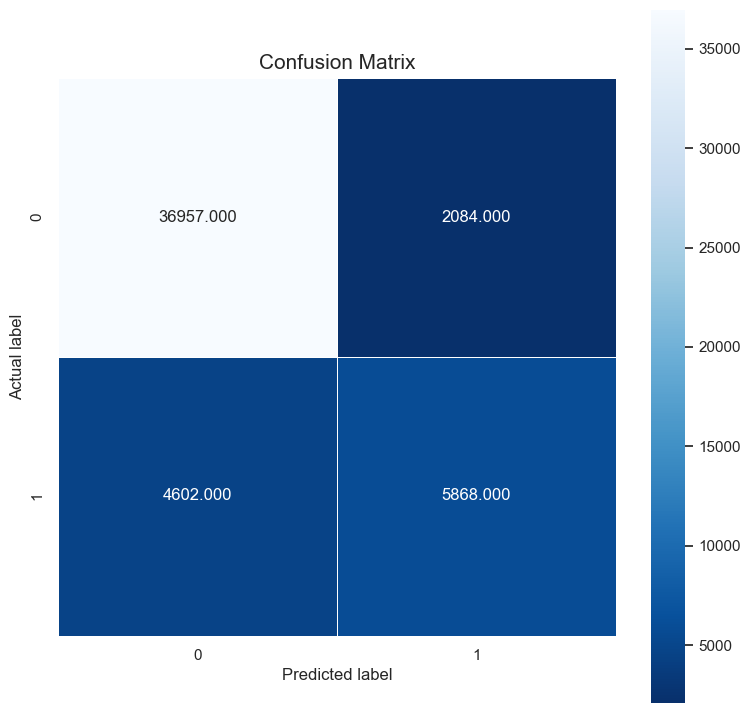

In [52]:
#plot confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## XGBoost Experiment 2 (undersampled balanced dataset)

## Load Data

In [53]:
train_norm_balanced = pd.read_csv('../data/train_norm_balanced.csv')

X_train_balanced = train_norm_balanced[features]
Y_train_balanced = train_norm_balanced["Exited"]

#### Fit and Evaluate on Train Data

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     24451
           1       0.89      0.88      0.88     24451

    accuracy                           0.88     48902
   macro avg       0.88      0.88      0.88     48902
weighted avg       0.88      0.88      0.88     48902



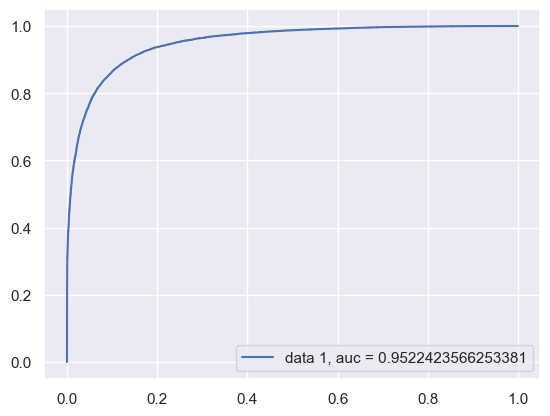

In [54]:
xgb_balanced = XGBClassifier(n_estimators = 200, random_state=42)

xgb_balanced.fit(X_train_balanced, Y_train_balanced)

predict_train = xgb_balanced.predict(X_train_balanced)

print(metrics.classification_report(Y_train_balanced, predict_train))

#ROC Curve and AUC
y_pred_proba = xgb_balanced.predict_proba(X_train_balanced)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train_balanced,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train_balanced, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     39041
           1       0.52      0.79      0.62     10470

    accuracy                           0.80     49511
   macro avg       0.73      0.80      0.74     49511
weighted avg       0.85      0.80      0.81     49511



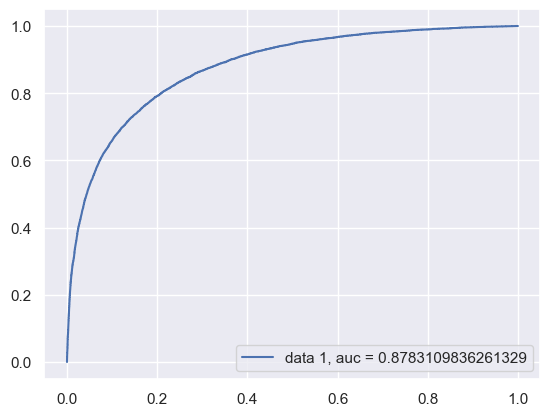

In [55]:
#make prediction on validation set
predict_val = xgb_balanced.predict(X_val)

#evaluate
print(metrics.classification_report(Y_val, predict_val))

y_pred_proba = xgb_balanced.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

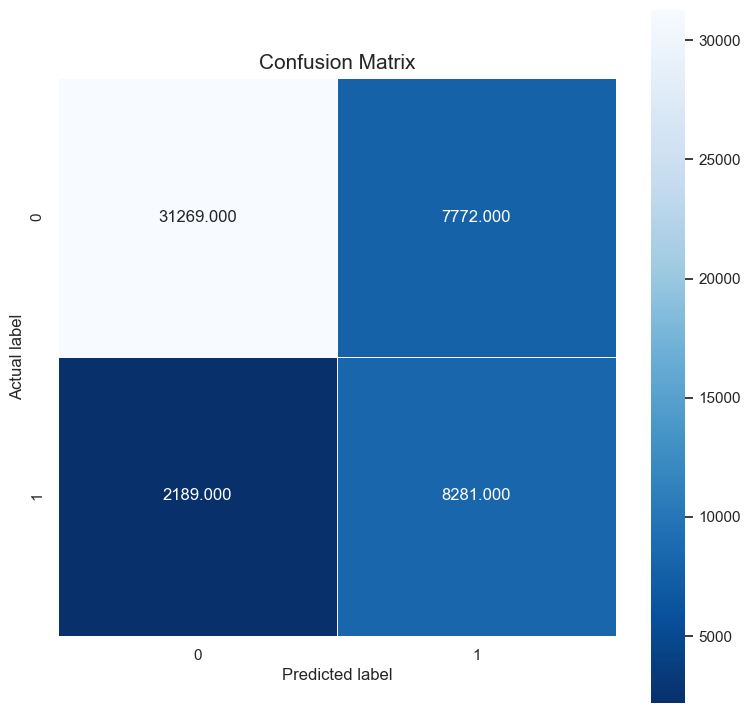

In [56]:
#plot confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## XGBoost Cross Validation 1

#### Define parameters

In [36]:
param_grid = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
}

#### Fit CV on Train Data

In [37]:
#create model object
xgb_func = XGBClassifier(random_state=42)

#create grid search model
xgb_cv = GridSearchCV(estimator = xgb_func, param_grid = param_grid, cv = 3, scoring = "f1", verbose = 1)
#fit on training set
xgb_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [200, 500, 1000],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=1)

#### Best Parameters from CV

In [38]:
print(f"Best Score: {xgb_cv.best_score_}, Best Param: {xgb_cv.best_params_}")

Best Score: 0.6343610685594531, Best Param: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.6}


## XGBoost Best Model (unbalanced)

#### Fit and Evaluate on Train Data

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     91072
           1       0.76      0.57      0.65     24451

    accuracy                           0.87    115523
   macro avg       0.83      0.76      0.79    115523
weighted avg       0.86      0.87      0.86    115523



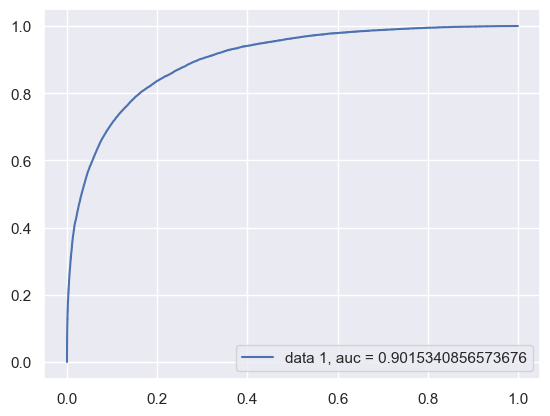

In [39]:
#build and fit model
xgb_best_unbalanced = XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.01, max_depth = 6, n_estimators = 1000, subsample = 0.6, random_state=42)

xgb_best_unbalanced.fit(X_train, Y_train)

predict_train = xgb_best_unbalanced.predict(X_train)

print(metrics.classification_report(Y_train, predict_train))

#ROC Curve and AUC
y_pred_proba = xgb_best_unbalanced.predict_proba(X_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     39041
           1       0.75      0.56      0.64     10470

    accuracy                           0.87     49511
   macro avg       0.82      0.75      0.78     49511
weighted avg       0.86      0.87      0.86     49511



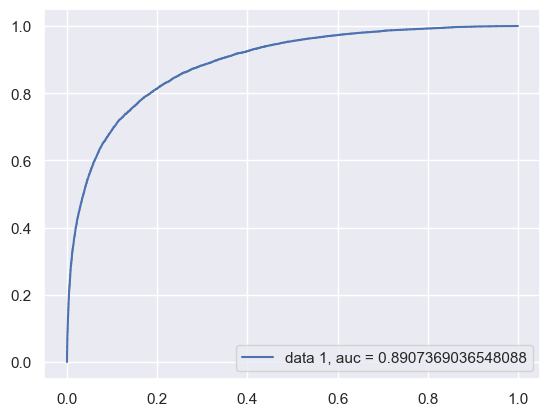

In [40]:
#make predictions
predict_val = xgb_best_unbalanced.predict(X_val)

#evaluate
print(metrics.classification_report(Y_val, predict_val))

y_pred_proba = xgb_best_unbalanced.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

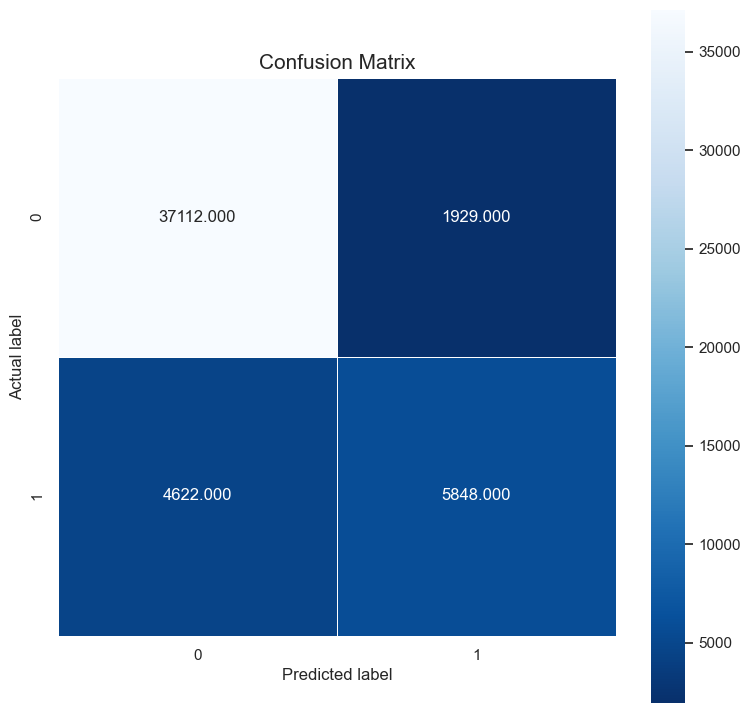

In [41]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## XGBoost Cross Validation 2 (undersampled balanced dataset)

## Fit CV on Train Data

In [42]:
#create model object
xgb_func = XGBClassifier(random_state=42)

#create grid search model
xgb_cv = GridSearchCV(estimator = xgb_func, param_grid = param_grid, cv = 3, scoring = "f1", verbose = 1)
#fit on training set
xgb_cv.fit(X_train_balanced, Y_train_balanced)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [200, 500, 1000],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=1)

In [43]:
print(f"Best Score: {xgb_cv.best_score_}, Best Param: {xgb_cv.best_params_}")

Best Score: 0.805942679617782, Best Param: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}


## XGBoost Best Model (undersampled balanced dataset)

#### Fit and Evaluate on Train Data

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     24451
           1       0.82      0.81      0.82     24451

    accuracy                           0.82     48902
   macro avg       0.82      0.82      0.82     48902
weighted avg       0.82      0.82      0.82     48902



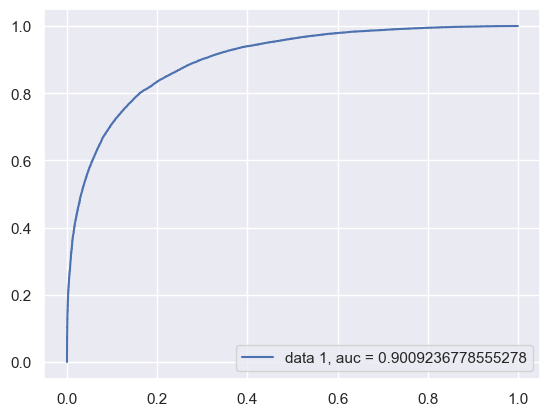

In [45]:
#build and fit model
xgb_best_balanced = XGBClassifier(colsample_bytree = 0.6, learning_rate = 0.1, max_depth = 3, n_estimators = 500, subsample = 0.6, random_state=42)

xgb_best_balanced.fit(X_train_balanced, Y_train_balanced)

predict_train = xgb_best_balanced.predict(X_train_balanced)

print(metrics.classification_report(Y_train_balanced, predict_train))

#ROC Curve and AUC
y_pred_proba = xgb_best_unbalanced.predict_proba(X_train_balanced)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train_balanced,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train_balanced, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     39041
           1       0.53      0.80      0.64     10470

    accuracy                           0.81     49511
   macro avg       0.74      0.81      0.76     49511
weighted avg       0.85      0.81      0.82     49511



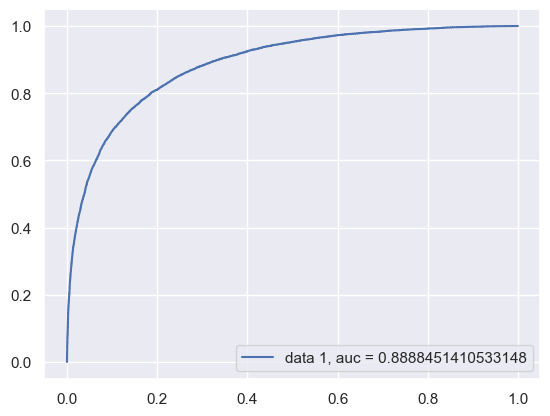

In [46]:
#make predictions
predict_val = xgb_best_balanced.predict(X_val)

#evaluate
print(metrics.classification_report(Y_val, predict_val))

y_pred_proba = xgb_best_balanced.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

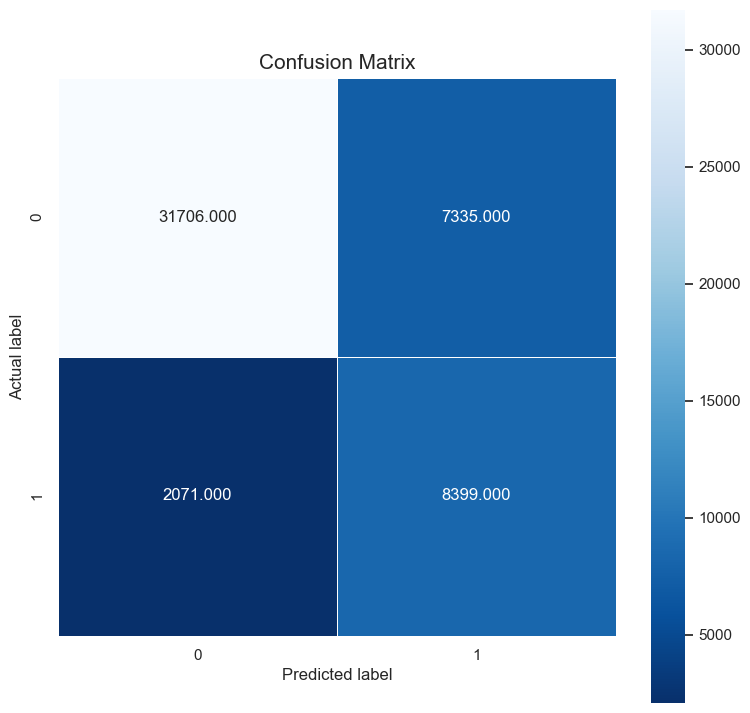

In [47]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

In [48]:
joblib.dump(xgb_best_unbalanced, "../models/xgb_best_unbalanced.joblib")
joblib.dump(xgb_best_balanced, "../models/xgb_best_balanced.joblib") 

['../models/xgb_best_balanced.joblib']